# Diabetes prediction Logistic Regression Model
Build a model predict diabetes using Logistic Regression Classifier.

### Working on DataSet Pima Indian Diabetes dataset from Kaggle and Using Logistic Regression to predict Diabetics
Target : Activities to be  classified into walking , walking upstairs , walking downstairs, sitting , 
         standing and laying .
Features : Sensors of smart phones .

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [122]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("data/pima-indians-diabetes.csv",header=None, names=col_names)

In [123]:
print(data.shape)

(768, 9)


In [124]:
#Print no of integers, floats and strings
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [125]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing Steps
1. Select Features .
2. Split the data into train and test sets.

## 1. Select Features .

In [126]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = data[feature_cols] 
# Target variable
y = data.label 

## 2. Split Data to Train and Test sets

In [127]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Modeling with Logisitc Regression 


In [128]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [129]:
coeffs = lr.coef_
print(coeffs.T)

[[ 8.44e-02]
 [-2.41e-04]
 [ 5.81e-02]
 [ 1.12e-02]
 [ 2.51e-02]
 [-1.58e-02]
 [ 6.16e-01]]


In [130]:
#making Predictions
y_hat = lr.predict(X_test)

In [131]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print(score)

0.8072916666666666


## Confusion Matrix and Plotting  

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_hat)
print(cnf_matrix)

[[119  11]
 [ 26  36]]


######      Confusion Matrix shows models ability to correctly predict or seperate classes .119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.


      

Text(0.5, 257.44, 'Predicted label')

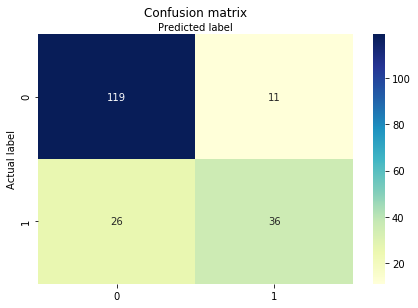

In [133]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Precison /Recall and F1- score

In [134]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



### ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
It shows the tradeoff between sensitivity and specificity.



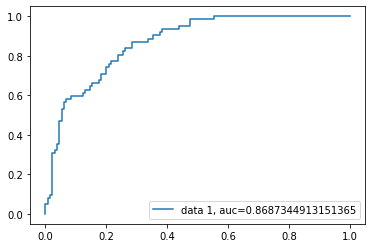

In [135]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Summary 

###### Logistic Classifier could predict with 80 % accuracy.
Precison - If Logistic Regression model predicted patients are going to suffer from diabetes, that patients will be  76% correct.
Recall - If there are patients who have diabetes in the test set , Logistic Regression model can identify it 58% of the time.
AUC score for the case is 0.86. AUC score 1 represents perfect classifier,